In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
Train = pd.read_csv("Train_merged.csv")

C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19731 entries, 0 to 19730
Data columns (total 51 columns):
Unnamed: 0               19731 non-null int64
Agreement_ID             19731 non-null int64
Foreclosure              19731 non-null int64
Customer_ID              19731 non-null int64
MOB                      19731 non-null int64
Loan_Amt                 19731 non-null object
NET_DISBURSED_AMT        19731 non-null object
Interest_Start_Date      19731 non-null object
Current_ROI              19731 non-null float64
Original_ROI             19731 non-null float64
Current_Tenure           19731 non-null float64
Original_Tenure          19731 non-null int64
Due_Day                  19731 non-null int64
Authorization_Date       19731 non-null object
City                     19731 non-null object
Pre_EMI_Due_Amt          19731 non-null float64
Pre_EMI_Received_Amt     19731 non-null float64
PRE_EMI_OS_AMOUNT        19731 non-null float64
EMI_Due_Amt              19731 non-null float6

In [4]:
from sklearn import preprocessing


# encode categorical variables using Label Encoder

# select all categorical variables
df_categorical = Train.select_dtypes(include=['object'])
df_categorical.head()

,Loan_Amt,NET_DISBURSED_AMT,Interest_Start_Date,Authorization_Date,City,Last_Receipt_Date,Product,NPA_In_Last_Month,NPA_In_Current_Month,Gender,Marital_Status,Qualification
0,"1,17,10,107.24","1,17,10,107.24",30-Aug-10,29-Aug-10,MUMBAI,05-May-14,HL,NaN,NaN,M,M,POSTGRAD
1,"1,92,90,253.32","1,92,90,253.32",15-Sep-10,15-Sep-10,MUMBAI,01-Nov-13,HL,NaN,NaN,M,M,POSTGRAD
2,"39,33,395.00","39,33,395.00",01-Nov-10,02-Nov-10,MUMBAI,05-Aug-17,HL,NaN,NaN,M,M,GRAD
3,"1,00,22,587.71","1,00,22,587.71",06-Oct-10,06-Oct-10,THANE,02-May-18,HL,NaN,NaN,M,M,POSTGRAD
4,"77,55,937.31","77,55,937.31",26-Oct-10,26-Oct-10,MUMBAI,05-Apr-18,HL,NaN,NaN,M,M,UG


In [5]:
TrainX_merged = pd.read_csv("TrainX_merged.csv")

In [6]:
df_categorical = df_categorical[['City','Product','Gender','Marital_Status','Qualification']]

In [7]:
df_categorical.Gender = df_categorical.Gender.astype('str')

In [8]:
df_categorical.Marital_Status = df_categorical.Marital_Status.astype('str')

In [9]:
df_categorical.Qualification = df_categorical.Qualification.astype('str')

In [10]:
# apply Label encoder to df_categorical

le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,City,Product,Gender,Marital_Status,Qualification
0,145,0,1,0,5
1,145,0,1,0,5
2,145,0,1,0,2
3,222,0,1,0,5
4,145,0,1,0,7


In [11]:
Train_data = pd.concat([TrainX_merged, df_categorical],axis = 1)

In [12]:
Train_data = Train_data.iloc[:,1:]

In [13]:
Train_data.head(100)

,Net_Disbursed_Amt,ROI_Change_Ratio,Tenure_Ratio,Tenure_Change_Ratio,Foreclosure,Net_LTV,City,Product,Gender,Marital_Status,Qualification
0,117.10,-0.26,1.00,0.62,1,40.06,145,0,1,0,5
1,192.90,-0.29,0.28,0.24,1,84.31,145,0,1,0,5
2,39.33,-0.36,0.26,-0.73,1,50.89,145,0,1,0,2
3,100.23,-0.06,1.00,0.49,1,84.63,222,0,1,0,5
4,77.56,-0.38,0.29,-0.69,1,30.94,145,0,1,0,7
5,9.54,-0.17,0.42,-0.31,0,23.24,222,0,1,0,2
6,66.06,-0.49,0.25,-0.30,0,60.69,145,0,1,0,2
7,329.60,-0.26,0.16,-0.09,1,87.75,145,0,1,0,5
8,84.07,-0.21,0.33,-0.00,1,84.25,222,0,1,0,2
9,9.76,-0.08,0.25,-1.16,0,23.77,222,1,2,2,8


In [14]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [15]:
# Putting feature variable to X
X = Train_data.drop(['Foreclosure'],axis=1)

# Putting response variable to y
y = Train_data['Foreclosure']

In [16]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state = 99)
X_train.head()

,Net_Disbursed_Amt,ROI_Change_Ratio,Tenure_Ratio,Tenure_Change_Ratio,Net_LTV,City,Product,Gender,Marital_Status,Qualification
16257,13.51,-0.10,0.02,-0.17,37.83,261,1,2,2,8
7515,30.03,0.00,0.10,0.00,70.92,90,2,1,1,7
1993,23.87,0.00,0.05,0.00,54.12,90,2,0,0,5
2239,27.58,-0.04,0.22,-0.03,73.06,2,0,1,0,7
16897,15.51,0.00,0.03,0.00,85.15,247,2,2,2,8


In [17]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [18]:
# fit
rfc.fit(X_train,y_train)

C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
# Making predictions
predictions = rfc.predict(X_test)

In [20]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [21]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5354
           1       0.80      0.55      0.65       566

   micro avg       0.94      0.94      0.94      5920
   macro avg       0.88      0.77      0.81      5920
weighted avg       0.94      0.94      0.94      5920



In [22]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[5274   80]
 [ 252  314]]


In [23]:
print(accuracy_score(y_test,predictions))

0.9439189189189189


In [24]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in versio

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [25]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.wa

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.037413,0.004204,0.914850,0.914959,2,{'max_depth': 2},4,0.910966,0.911025,0.924358,...,0.910934,0.911033,0.910934,0.911033,0.917059,0.915566,0.004210,0.000683,0.005311,0.005860
1,0.079718,0.004606,0.938382,0.948212,7,{'max_depth': 7},3,0.940282,0.948407,0.939558,...,0.937726,0.947778,0.937364,0.949679,0.936979,0.947240,0.016822,0.000493,0.001298,0.000823
2,0.102272,0.006921,0.944392,0.974169,12,{'max_depth': 12},1,0.943902,0.974747,0.947883,...,0.944605,0.972848,0.943519,0.974658,0.942050,0.973484,0.009559,0.000804,0.001935,0.000857
3,0.117213,0.007418,0.942510,0.988650,17,{'max_depth': 17},2,0.941006,0.988052,0.942454,...,0.942433,0.990316,0.945329,0.986334,0.941326,0.988416,0.001859,0.002230,0.001525,0.001467


C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


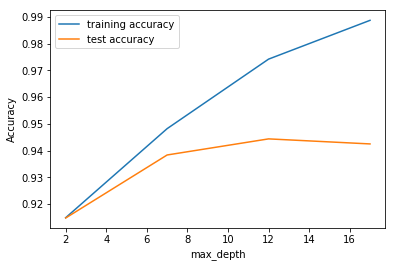

In [26]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [27]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [28]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.wa

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.483286,0.025267,0.934328,0.935504,100,{'n_estimators': 100},2,0.939558,0.935011,0.935577,...,0.927227,0.936465,0.934830,0.935288,0.934444,0.935113,0.039718,0.000834,0.003990,0.000526
1,2.432973,0.118612,0.934400,0.935233,500,{'n_estimators': 500},1,0.940644,0.935373,0.937387,...,0.927589,0.936193,0.932295,0.934202,0.934082,0.934661,0.081373,0.001190,0.004446,0.000719
2,4.295334,0.223903,0.933893,0.935649,900,{'n_estimators': 900},4,0.939920,0.935463,0.935577,...,0.927589,0.936646,0.931933,0.934202,0.934444,0.935656,0.095374,0.008468,0.004076,0.000839
3,6.040612,0.353726,0.933966,0.935577,1300,{'n_estimators': 1300},3,0.940282,0.935101,0.935939,...,0.927227,0.936555,0.933382,0.935650,0.932995,0.934570,0.244222,0.024486,0.004254,0.000691


C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


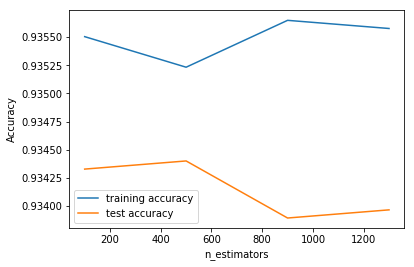

In [29]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [32]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 5, 6, 7, 8]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in versio

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': [4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [34]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.wa

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_features,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.059774,0.004295,0.933386,0.935595,4,{'max_features': 4},4,0.935215,0.934558,0.932320,...,0.929761,0.937732,0.935916,0.935922,0.933720,0.934208,0.006090,0.000568,0.002197,0.001239
1,0.072802,0.004707,0.935631,0.936699,5,{'max_features': 5},1,0.940644,0.936731,0.934853,...,0.930123,0.937279,0.937002,0.936827,0.935531,0.936471,0.008188,0.000828,0.003405,0.000366
2,0.078200,0.004613,0.933604,0.935504,6,{'max_features': 6},3,0.938473,0.934468,0.935215,...,0.930123,0.938094,0.933020,0.933750,0.931184,0.934118,0.001643,0.000862,0.002987,0.001750
3,0.099774,0.003905,0.933242,0.935921,7,{'max_features': 7},5,0.934130,0.934920,0.929786,...,0.927227,0.934564,0.937726,0.937370,0.937342,0.938281,0.016754,0.000379,0.004143,0.001589
4,0.106788,0.003910,0.933748,0.936482,8,{'max_features': 8},2,0.934491,0.935373,0.932682,...,0.931933,0.940266,0.935554,0.934293,0.934082,0.936652,0.011338,0.000375,0.001293,0.002040


C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


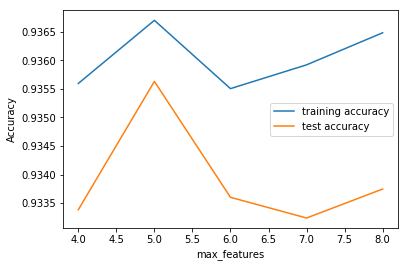

In [35]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [36]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in versio

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(100, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [37]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.wa

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_min_samples_leaf,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.072708,0.005796,0.928825,0.930255,100,{'min_samples_leaf': 100},1,0.932320,0.931028,0.930148,...,0.917813,0.925785,0.932657,0.933388,0.931184,0.931222,0.007543,0.001199,0.005576,0.002510
1,0.068681,0.006016,0.926870,0.927141,150,{'min_samples_leaf': 150},2,0.930148,0.930576,0.922186,...,0.926140,0.930763,0.932657,0.931034,0.923216,0.921176,0.007829,0.003264,0.004002,0.004483
2,0.077206,0.006215,0.922670,0.924028,200,{'min_samples_leaf': 200},3,0.923272,0.919352,0.918929,...,0.922158,0.927776,0.928313,0.930582,0.920681,0.921267,0.008952,0.002044,0.003176,0.004352
3,0.069280,0.004822,0.916443,0.917910,250,{'min_samples_leaf': 250},4,0.924720,0.929218,0.913500,...,0.911296,0.912390,0.910934,0.911395,0.921767,0.922081,0.005950,0.001127,0.005698,0.006783
4,0.060358,0.004422,0.911520,0.911357,300,{'min_samples_leaf': 300},6,0.913500,0.912744,0.910966,...,0.910934,0.911033,0.910934,0.911033,0.911264,0.910950,0.011580,0.000858,0.000998,0.000694


C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


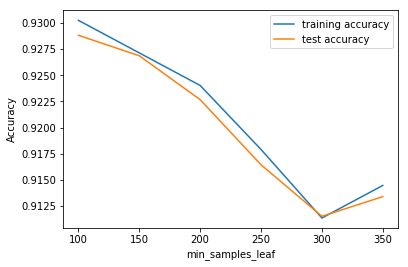

In [38]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [39]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in versio

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(200, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [40]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.wa

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_min_samples_split,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.092847,0.004913,0.931721,0.935649,200,{'min_samples_split': 200},1,0.924720,0.929399,0.934853,...,0.930485,0.937822,0.932295,0.937641,0.936255,0.937557,0.018212,0.000201,0.004031,0.003207
1,0.073607,0.004506,0.930056,0.932916,250,{'min_samples_split': 250},2,0.924358,0.932024,0.930510,...,0.928675,0.936284,0.935192,0.932030,0.931547,0.933937,0.003469,0.000326,0.003555,0.002039
2,0.078692,0.005614,0.929839,0.931359,300,{'min_samples_split': 300},3,0.934130,0.931481,0.930148,...,0.926503,0.930310,0.930847,0.933388,0.927562,0.931222,0.007828,0.001149,0.002677,0.001112
3,0.089030,0.005427,0.927304,0.931087,350,{'min_samples_split': 350},5,0.924720,0.929127,0.926167,...,0.922520,0.932302,0.929761,0.931940,0.933357,0.932670,0.012264,0.000801,0.003835,0.001510
4,0.071290,0.005413,0.927594,0.929187,400,{'min_samples_split': 400},4,0.924358,0.928313,0.929063,...,0.925054,0.930491,0.929761,0.930220,0.929736,0.927421,0.003595,0.001882,0.002382,0.001161


C:\Users\SharmilaK1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


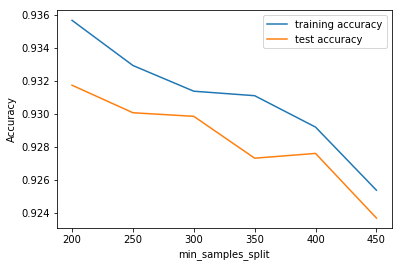

In [41]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [33]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=12,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=5,
                             n_estimators=500)

In [44]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [45]:
# accuracy score
rfc.score(X_test,y_test)

0.9307432432432432

In [47]:
import pickle
# save the model to disk
filename = 'edelweiss_random_forests_model.sav'
pickle.dump(rfc, open(filename, 'wb'))